<a href="https://colab.research.google.com/github/sivasriharshapulipati/Mobile-recommondation-sys/blob/main/Mobile_Phone_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset
df = pd.read_csv('/content/mainDataset.csv', encoding='unicode_escape')

# Get user data and create a DataFrame
user_data = {
    "Name": ['harsha'],
    "Rating": [4],
    "Price Rs": [20000],
    "RAM Gb": [8],
    "ROM Gb": [128],
    "Expandable GB": [' '],
    "Size Cm": [' '],
    "Size Inch": [6.52],
    "R1 Cam MP": [58],
    "R2 Cam MP": [' '],
    "R3 Cam MP": [' '],
    "R4 Cam MP": [' '],
    "Battery Mah": [5000],
    "Processor": 'snapdragon ',
    "Image": ' '
}
user_df = pd.DataFrame(user_data)

# Append the user dataframe to the main dataframe
df = user_df.append(df, ignore_index=True)

# Select Features
features = ['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']

# Create a column which will contain all these features
def combineFeatures(row):
    return ' '.join([str(row[feature]) for feature in features])

# This will create a separate column of combined features
df["combinedFeatures"] = df.apply(combineFeatures, axis=1)

# Create count matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combinedFeatures'])

# Calculate cosine similarity
similar = cosine_similarity(count_matrix)

# Get indices of similar phones
similar_phones = list(enumerate(similar[0]))

# Sort the entries according to similarity scores
sorted_similar_phones = sorted(similar_phones, key=lambda x: x[1], reverse=True)

# Retrieve the most similar 10 phones
top_10_phones = []
for phone in sorted_similar_phones:
    if df.loc[phone[0], 'Name'] != 'User Req name':
        top_10_phones.append(df.loc[phone[0], 'Name'])
    if len(top_10_phones) == 10:
        break

# Print the most similar phones
print(top_10_phones)


['harsha', 'OPPO A9 2020 (Vanilla Mint, 128 GB)', 'OPPO A9 2020 (Vanilla Mint, 128 GB)', 'Realme C3 (Volcano Grey, 64 GB)', 'Realme C3 (Frozen Blue, 32 GB)', 'Tecno Spark Go 2020 (Ice jadeite, 32 GB)', 'Tecno Spark Go 2020 (Aqua Blue, 32 GB)', 'Realme C3 (Volcano Grey, 32 GB)', 'Realme C3 (Blazing Red, 64 GB)', 'Motorola One Fusion+ (Twilight Blue, 128 GB)']


<ipython-input-2-a8c2c02d5913>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = user_df.append(df, ignore_index=True)


In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/mainDataset.csv', encoding='unicode_escape')

In [5]:
df.head()

,Name,Rating,Price Rs,RAM Gb,ROM Gb,Expandable GB,Size Cm,Size Inch,R1 Cam MP,R2 Cam MP,R3 Cam MP,R4 Cam MP,Battery Mah,Processor,Image
0,"Realme Narzo 20 (Victory Blue, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
1,"Realme Narzo 20 (Victory Blue, 64 GB)",4.5,"10,499",4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
2,"Realme Narzo 20 (Glory Sliver, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
3,"Realme Narzo 20 (Glory Sliver, 64 GB)",4.5,"10,499",4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
4,"POCO M2 (Pitch Black, 64 GB)",4.4,"10,999",6,64,512.0,16.59,6.53,13.0,8.0,5,2.0,5000,MediaTek Helio G80 Processor,https://rukminim1.flixcart.com/image/312/312/k...


In [ ]:
df.shape

(961, 15)

In [7]:
# Data preprocessing
df['Rating'] = pd.to_numeric(df['Rating'])
df['Price Rs'] = df['Price Rs'].str.replace(',', '').astype(float)
df['RAM Gb'] = pd.to_numeric(df['RAM Gb'])
df['ROM Gb'] = pd.to_numeric(df['ROM Gb'])
df['Size Inch'] = pd.to_numeric(df['Size Inch'])
df['R1 Cam MP'] = pd.to_numeric(df['R1 Cam MP'])
df['Battery Mah'] = pd.to_numeric(df['Battery Mah'])

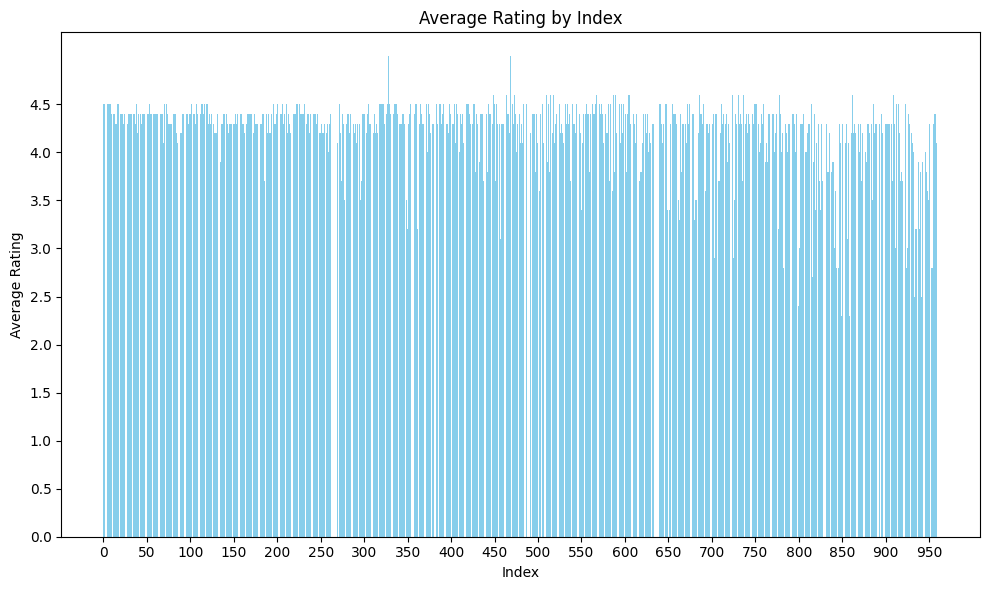

In [30]:
# Bar graph: Average Rating by Index
average_rating_by_index = df['Rating']
plt.figure(figsize=(10, 6))
plt.bar(df.index, average_rating_by_index, color='skyblue')
plt.title('Average Rating by Index')
plt.xlabel('Index')
plt.ylabel('Average Rating')
plt.xticks(np.arange(0, len(df.index), 50))
plt.yticks(np.arange(0, 5, 0.5))
plt.tight_layout()
plt.show()

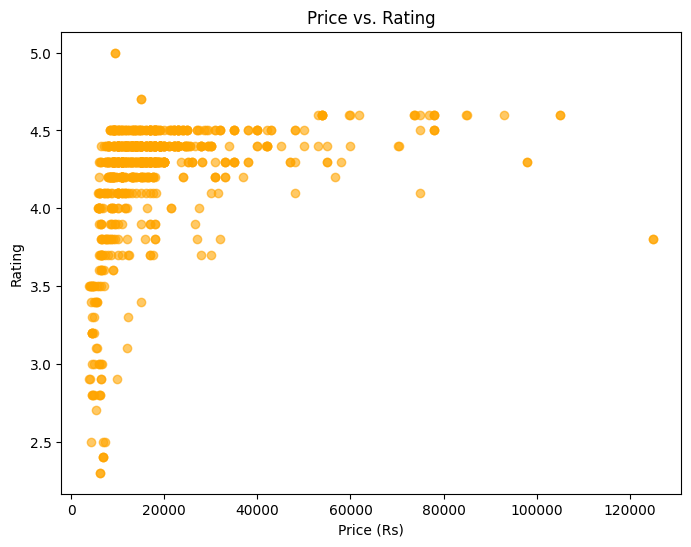

In [13]:
# Scatter plot: Price vs. Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Rs'], df['Rating'], color='orange', alpha=0.6)
plt.title('Price vs. Rating')
plt.xlabel('Price (Rs)')
plt.ylabel('Rating')
plt.show()

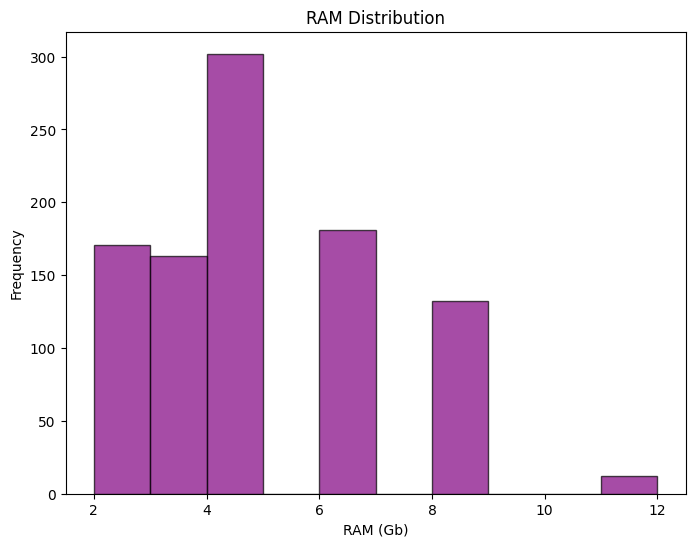

In [14]:
# Histogram: RAM Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['RAM Gb'], bins=10, color='purple', edgecolor='black', alpha=0.7)
plt.title('RAM Distribution')
plt.xlabel('RAM (Gb)')
plt.ylabel('Frequency')
plt.show()

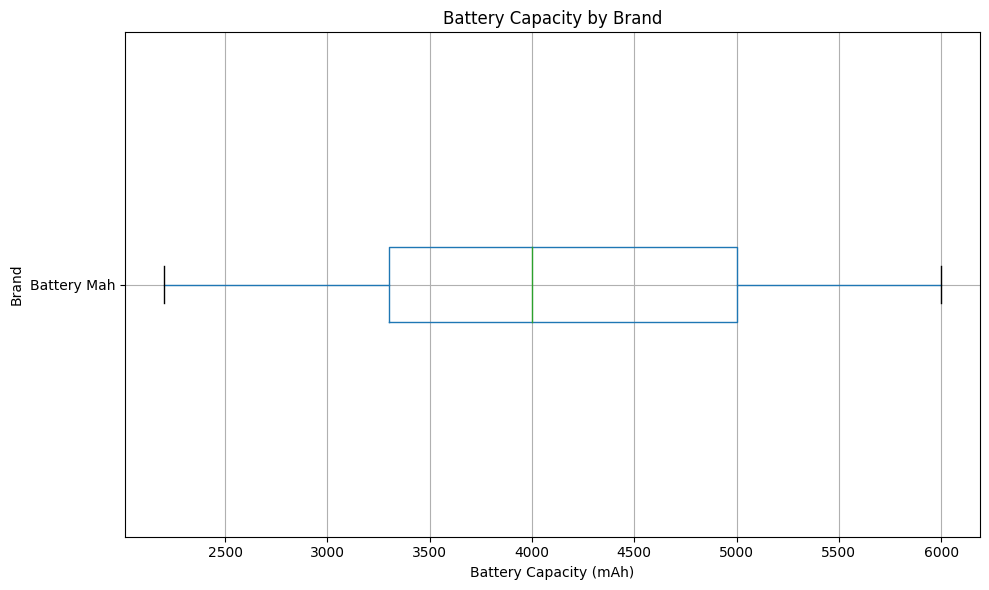

In [25]:
# Box plot: Battery Capacity by Brand
plt.figure(figsize=(10, 6))
df.boxplot(column='Battery Mah', vert=False)
plt.title('Battery Capacity by Brand')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [ ]:
user_data = {
    "Name": ['harsha'],
    "Rating": [4],
    "Price Rs": [20000],
    "RAM Gb": [8],
    "ROM Gb": [128],
    "Expandable GB": [' '],
    "Size Cm": [' '],
    "Size Inch": [6.52],
    "R1 Cam MP": [58],
    "R2 Cam MP": [' '],
    "R3 Cam MP": [' '],
    "R4 Cam MP": [' '],
    "Battery Mah": [5000],
    "Processor": 'snapdragon ',
    "Image": ' '
}
user_df = pd.DataFrame(user_data);

df = pd.concat([user_df, df], ignore_index=True)

In [ ]:
features = ['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']
print(features)

['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']


In [ ]:
#replacing the null values with null string
for feature in features:
  df[feature] = df[feature].fillna('')

In [ ]:
# Create a column which will contain all these features
def combineFeatures(row):
    return ' '.join([str(row[feature]) for feature in features])

# This will create a separate column of combined features
df["combinedFeatures"] = df.apply(combineFeatures, axis=1)

In [ ]:
df.head()

,Name,Rating,Price Rs,RAM Gb,ROM Gb,Expandable GB,Size Cm,Size Inch,R1 Cam MP,R2 Cam MP,R3 Cam MP,R4 Cam MP,Battery Mah,Processor,Image,combinedFeatures
0,harsha,4.0,20000,8,128,,,6.52,58.0,,,,5000,snapdragon,,20000 4.0 8 128 6.52 58.0 5000
1,harsha,4.0,20000,8,128,,,6.52,58.0,,,,5000,snapdragon,,20000 4.0 8 128 6.52 58.0 5000
2,"Realme Narzo 20 (Victory Blue, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,"11,499 4.5 4 128 6.52 48.0 6000"
3,"Realme Narzo 20 (Victory Blue, 64 GB)",4.5,"10,499",4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,"10,499 4.5 4 64 6.52 48.0 6000"
4,"Realme Narzo 20 (Glory Sliver, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,"11,499 4.5 4 128 6.52 48.0 6000"


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combinedFeatures'])

In [ ]:
# Calculate cosine similarity
similar = cosine_similarity(count_matrix)

In [ ]:
print(similar)

[[1.         1.         0.36514837 ... 0.         0.         0.        ]
 [1.         1.         0.36514837 ... 0.         0.         0.        ]
 [0.36514837 0.36514837 1.         ... 0.         0.20412415 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.2236068  0.4       ]
 [0.         0.         0.20412415 ... 0.2236068  1.         0.2236068 ]
 [0.         0.         0.         ... 0.4        0.2236068  1.        ]]


In [ ]:
print(similar.shape)

(963, 963)


In [ ]:
# Get indices of similar phones
similar_phones = list(enumerate(similar[0]))

In [ ]:
# Sort the entries according to similarity scores
sorted_similar_phones = sorted(similar_phones, key=lambda x: x[1], reverse=True)

In [31]:
# Retrieve the most similar 10 phones
top_10_phones = []
for phone in sorted_similar_phones:
    if df.loc[phone[0], 'Name'] != 'User Req name':
        top_10_phones.append(df.loc[phone[0], 'Name'])
    if len(top_10_phones) == 10:
        break

# Print the most similar phones
print(top_10_phones)

NameError: ignored

In [ ]:


i = 0
for i in range(10):
  print( i+1 , "-",top_10_phones[i])


1 - harsha
2 - harsha
3 - OPPO A9 2020 (Vanilla Mint, 128 GB)
4 - OPPO A9 2020 (Vanilla Mint, 128 GB)
5 - Realme C3 (Volcano Grey, 64 GB)
6 - Realme C3 (Frozen Blue, 32 GB)
7 - Tecno Spark Go 2020 (Ice jadeite, 32 GB)
8 - Tecno Spark Go 2020 (Aqua Blue, 32 GB)
9 - Realme C3 (Volcano Grey, 32 GB)
